In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('uncleaned_dataset.csv', sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Renaming some variables and rounding up curricular units

In [4]:
data = data.rename(columns=({'Nacionality':'Nationality'}))
data = data.rename(columns=({'Daytime/evening attendance	':'Daytime/evening attendance'}))
data['Curricular units 1st sem (grade)'] = data['Curricular units 1st sem (grade)'].round(2)
data['Curricular units 2nd sem (grade)'] = data['Curricular units 2nd sem (grade)'].round(2)

In [7]:
data.to_csv('cleaned_dataset.csv', index=False)

<Axes: >

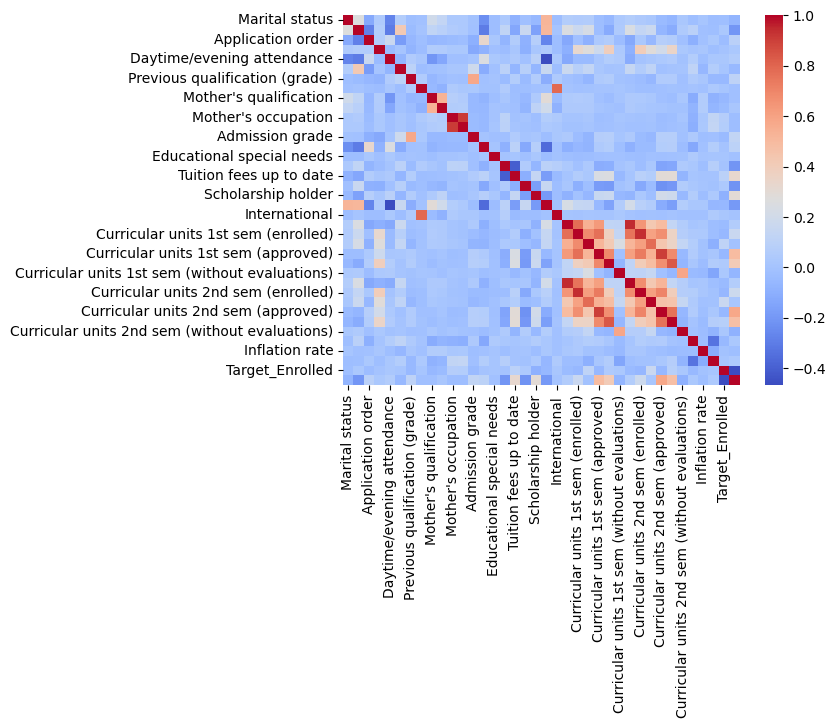

In [5]:
#Spearman
#Encoding the data as .corr does not work with string variables, thus we convert them to 1, 2, ect.
encodedData = pd.get_dummies(data, drop_first=True)

# Calculate Pearson correlations for all variables
correlation_matrix = encodedData.corr(method='pearson')

# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

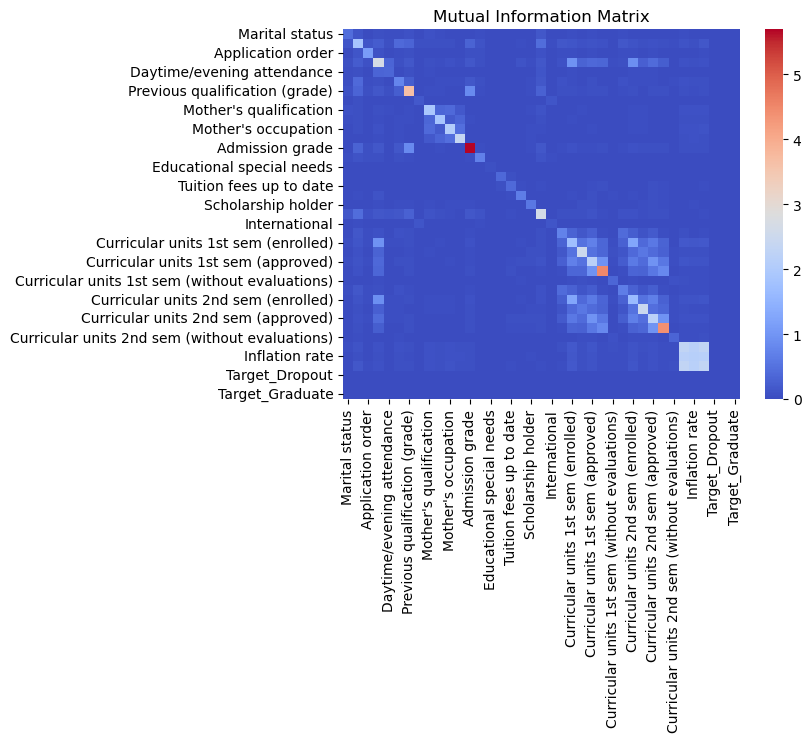

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

encodedData = pd.get_dummies(data)

mi_matrix = np.zeros((encodedData.shape[1], encodedData.shape[1]))

#Calculate mutual information for all pairs of features
for i in range(encodedData.shape[1]):
    for j in range(i, encodedData.shape[1]):
        # If both columns are continuous, use mutual_info_regression
        if encodedData.iloc[:, i].dtype in ['float64', 'int64'] and encodedData.iloc[:, j].dtype in ['float64', 'int64']:
            mi_value = mutual_info_regression(encodedData.iloc[:, [i]], encodedData.iloc[:, j])[0]
        # If both columns are categorical, use mutual_info_classif
        elif encodedData.iloc[:, i].dtype == 'uint8' and encodedData.iloc[:, j].dtype == 'uint8':
            mi_value = mutual_info_classif(encodedData.iloc[:, [i]], encodedData.iloc[:, j])[0]
        else:
            mi_value = 0  # Assign 0 if not comparable
        
        mi_matrix[i, j] = mi_value
        mi_matrix[j, i] = mi_value  # Matrix is symmetric

#Convert the matrix to DataFrame for easier visualization
mi_matrix_df = pd.DataFrame(mi_matrix, columns=encodedData.columns, index=encodedData.columns)

sns.heatmap(mi_matrix_df, annot=False, cmap='coolwarm')
plt.title("Mutual Information Matrix")
plt.show()